## 导入需要的模块和库

In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 导入数据，探索数据

In [4]:
data = pd.read_csv('./data/digit recognizor.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape

(42000, 784)

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 画累计方差贡献率曲线，找最佳降维后维度的范围

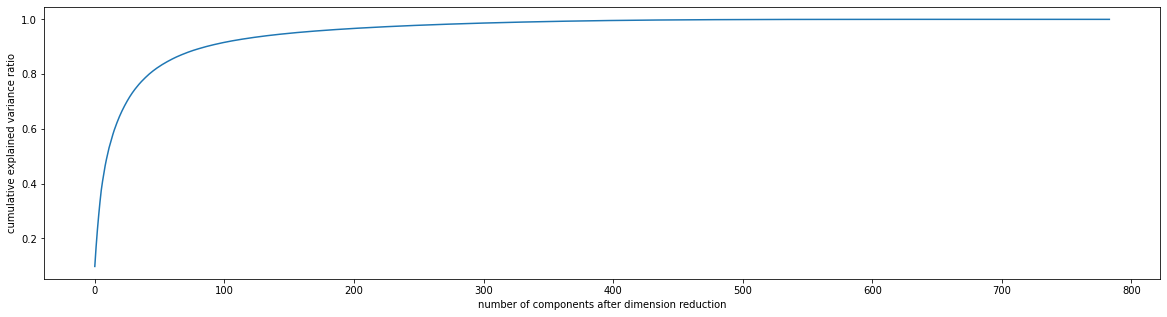

In [7]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20, 5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()

## 降维后维度的学习曲线，继续缩小最佳维度的范围

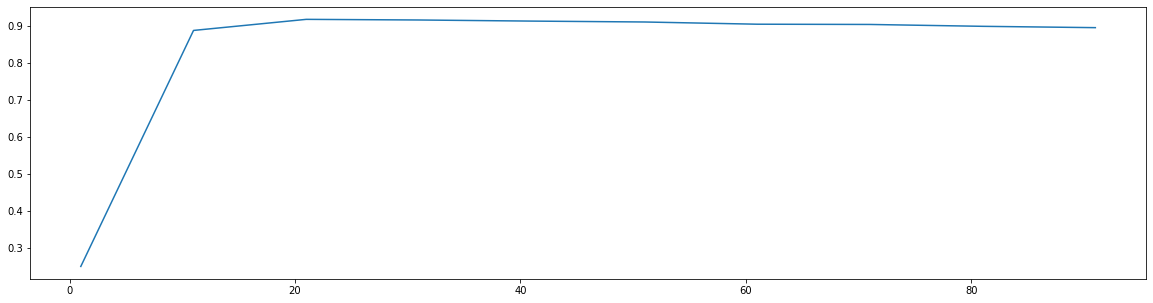

In [8]:
%%time
score = []
for i in range(1, 101, 10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(
        RFC(n_estimators=10, random_state=0, n_jobs=-1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101, 10), score)
plt.show()

## 细化学习曲线，找出降维后的最佳维度

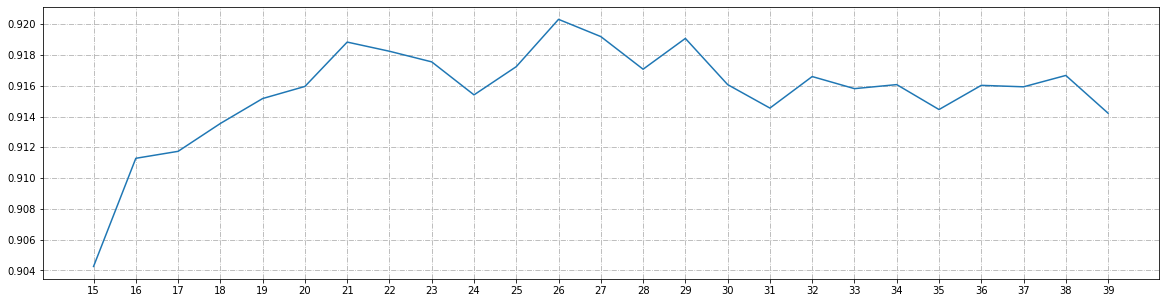

In [23]:
%%time
score = []
for i in range(15, 40):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(
        RFC(n_estimators=10, random_state=0, n_jobs=-1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(15, 40), score)
plt.xticks([*range(15, 40)])
plt.grid(True, linestyle = "-.")
plt.show()

In [19]:
best_index = np.array(score).argmax()
best_score = score[best_index]
best_k = [*range(15, 40)][best_index]
best_k

26

## 导入找出的最佳维度进行降维，查看模型效果

In [25]:
%%time
X_dr = PCA(26).fit_transform(X)
cross_val_score(RFC(n_estimators=100, random_state=0, n_jobs=-1), X_dr, y, cv=5).mean()

CPU times: user 12.8 s, sys: 2.84 s, total: 15.7 s
Wall time: 30.6 s


0.9459761904761905

## 突发奇想，特征数量已经不足原来的3%，换模型怎么样？

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(n_jobs=-1), X_dr, y, cv=5).mean()

0.9710000000000001

## KNN的k值学习曲线

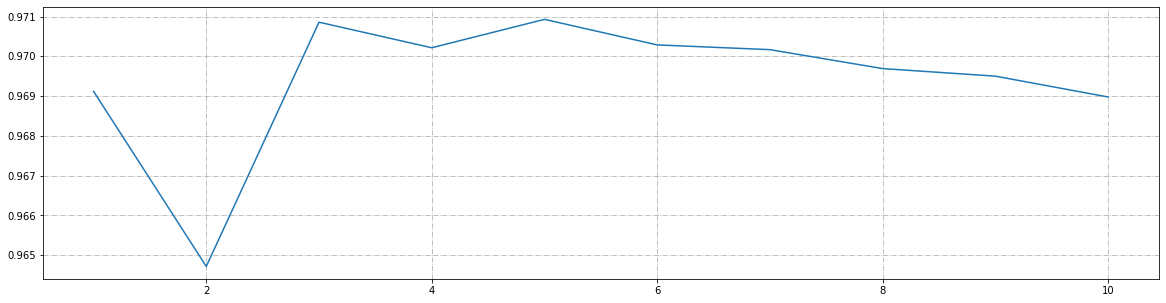

CPU times: user 24.1 s, sys: 1.9 s, total: 26 s
Wall time: 1min 40s


In [29]:
%%time
score = []
X_dr = PCA(26).fit_transform(X)
for i in range(1, 11):
    once = cross_val_score(KNN(i, n_jobs=-1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 11), score)
plt.grid(True, linestyle = "-.")
plt.show()

In [30]:
best_index = np.array(score).argmax()
best_score = score[best_index]
best_k = [*range(1, 11)][best_index]
best_k

5

## 定下超参数后，模型效果如何，模型运行时间如何？

In [31]:
cross_val_score(KNN(best_k, n_jobs=-1), X_dr, y, cv=5).mean()

0.9709285714285715

In [36]:
cross_val_score(KNN(n_jobs=-1), X_dr, y, cv=5).mean()

0.9709285714285715

<font color='red'>n_neighbors默认是5, 默认就是最好的，设置了反而降低了</font>

In [35]:
%%timeit
#=======【TIME WARNING: 3mins】======#
cross_val_score(KNN(n_jobs=-1), X_dr, y, cv=5).mean()

8.91 s ± 65.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
